# Electric Vehicle Population EDA (2024)

## Purpose of This EDA
This EDA explores the 2024 electric vehicle population across different counties.  
It helps us understand which regions have higher EV adoption and what types of EVs are most common.  
The analysis also reveals patterns in vehicle make, model, and electric range, giving insights into the growth of clean transportation.


In [2]:
import pandas as pd

In [31]:
df = pd.read_csv("/Users/anands/Downloads/Electric_Vehicle_Population_Size_History_By_County_.csv",parse_dates=["Date"])

In [33]:
df.head()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,2022-09-30,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,2022-12-31,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,2020-01-31,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,2022-06-30,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00
4,2021-07-31,Douglas,CO,Passenger,0,1,1,83,84,1.19


In [36]:
df.tail()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
20814,2023-01-31,Rockingham,NH,Passenger,1,0,1,14,15,6.67
20815,2020-07-31,Carson City,NV,Passenger,1,0,1,10,11,9.09
20816,2022-02-28,Island,WA,Passenger,744,350,"1,094","62,257","63,351",1.73
20817,2020-12-31,San Diego,CA,Passenger,14,2,16,"2,724","2,740",0.58
20818,2019-11-30,Goochland,VA,Passenger,3,1,4,271,275,1.45


In [38]:
df.shape

(20819, 10)

In [40]:
df.columns

Index(['Date', 'County', 'State', 'Vehicle Primary Use',
       'Battery Electric Vehicles (BEVs)',
       'Plug-In Hybrid Electric Vehicles (PHEVs)',
       'Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total',
       'Total Vehicles', 'Percent Electric Vehicles'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Date                                      20819 non-null  datetime64[ns]
 1   County                                    20733 non-null  object        
 2   State                                     20733 non-null  object        
 3   Vehicle Primary Use                       20819 non-null  object        
 4   Battery Electric Vehicles (BEVs)          20819 non-null  object        
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20819 non-null  object        
 6   Electric Vehicle (EV) Total               20819 non-null  object        
 7   Non-Electric Vehicle Total                20819 non-null  object        
 8   Total Vehicles                            20819 non-null  object        
 9   Percent Electric Vehicles   

In [44]:
df.describe()

,Date,Percent Electric Vehicles
count,20819,20819.000000
mean,2020-11-13 19:57:00.855949056,4.139216
min,2017-01-31 00:00:00,0.000000
25%,2019-03-31 00:00:00,0.390000
50%,2020-12-31 00:00:00,1.220000
75%,2022-07-31 00:00:00,2.995000
max,2024-02-29 00:00:00,100.000000
std,NaN,11.055350


In [46]:
df.isnull().sum()

Date                                         0
County                                      86
State                                       86
Vehicle Primary Use                          0
Battery Electric Vehicles (BEVs)             0
Plug-In Hybrid Electric Vehicles (PHEVs)     0
Electric Vehicle (EV) Total                  0
Non-Electric Vehicle Total                   0
Total Vehicles                               0
Percent Electric Vehicles                    0
dtype: int64

In [48]:
df.isnull().sum().sum()

172

## Handling Missing Values in County and State Columns

In [ ]:
# Cleaning Missing Values in County and State Columns

In [51]:
df['County'] = df['County'].fillna(df['County'].mode()[0])
df['State'] = df['State'].fillna(df['State'].mode()[0])

In [55]:
df.isnull().sum()

Date                                        0
County                                      0
State                                       0
Vehicle Primary Use                         0
Battery Electric Vehicles (BEVs)            0
Plug-In Hybrid Electric Vehicles (PHEVs)    0
Electric Vehicle (EV) Total                 0
Non-Electric Vehicle Total                  0
Total Vehicles                              0
Percent Electric Vehicles                   0
dtype: int64

## Renaming Columns for Better Clarity

In [60]:
new_cols = [row.lower().strip().replace(" ","_").replace("-","_") for row in df.columns]

df.columns = new_cols

df.columns

Index(['date', 'county', 'state', 'vehicle_primary_use',
       'battery_electric_vehicles_(bevs)',
       'plug_in_hybrid_electric_vehicles_(phevs)',
       'electric_vehicle_(ev)_total', 'non_electric_vehicle_total',
       'total_vehicles', 'percent_electric_vehicles'],
      dtype='object')

In [62]:
df.head()

,date,county,state,vehicle_primary_use,battery_electric_vehicles_(bevs),plug_in_hybrid_electric_vehicles_(phevs),electric_vehicle_(ev)_total,non_electric_vehicle_total,total_vehicles,percent_electric_vehicles
0,2022-09-30,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,2022-12-31,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,2020-01-31,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,2022-06-30,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00
4,2021-07-31,Douglas,CO,Passenger,0,1,1,83,84,1.19


## Handling Duplicate Records

In [67]:
df.duplicated().sum()

0

In [ ]:
# No duplicate records were found in the dataset.  
# Therefore, no duplicate removal was required.

## Checking Data Types

In [72]:
df.dtypes

date                                        datetime64[ns]
county                                              object
state                                               object
vehicle_primary_use                                 object
battery_electric_vehicles_(bevs)                    object
plug_in_hybrid_electric_vehicles_(phevs)            object
electric_vehicle_(ev)_total                         object
non_electric_vehicle_total                          object
total_vehicles                                      object
percent_electric_vehicles                          float64
dtype: object

## Cleaning Data Types

In [75]:
df.columns

Index(['date', 'county', 'state', 'vehicle_primary_use',
       'battery_electric_vehicles_(bevs)',
       'plug_in_hybrid_electric_vehicles_(phevs)',
       'electric_vehicle_(ev)_total', 'non_electric_vehicle_total',
       'total_vehicles', 'percent_electric_vehicles'],
      dtype='object')

In [77]:
cols = [
    'battery_electric_vehicles_(bevs)',
    'plug_in_hybrid_electric_vehicles_(phevs)',
    'electric_vehicle_(ev)_total',
    'non_electric_vehicle_total',
    'total_vehicles',
    'percent_electric_vehicles'
]

for col in cols:
    df[col] = df[col].astype(str).str.replace(',', '')   # remove commas
    df[col] = pd.to_numeric(df[col], errors='coerce')    # convert to int/float


In [79]:
int_cols = [
    'battery_electric_vehicles_(bevs)',
    'plug_in_hybrid_electric_vehicles_(phevs)',
    'electric_vehicle_(ev)_total',
    'non_electric_vehicle_total',
    'total_vehicles'
]

for col in int_cols:
    df[col] = df[col].fillna(0).astype(int)


In [81]:
df['percent_electric_vehicles'] = df['percent_electric_vehicles'].astype(float)

In [83]:
df.dtypes

date                                        datetime64[ns]
county                                              object
state                                               object
vehicle_primary_use                                 object
battery_electric_vehicles_(bevs)                     int64
plug_in_hybrid_electric_vehicles_(phevs)             int64
electric_vehicle_(ev)_total                          int64
non_electric_vehicle_total                           int64
total_vehicles                                       int64
percent_electric_vehicles                          float64
dtype: object

## Exploring the Dataset (Univariate Analysis)

In [86]:
df['battery_electric_vehicles_(bevs)'].describe()

count    20819.000000
mean       217.516211
std       2278.533317
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max      72333.000000
Name: battery_electric_vehicles_(bevs), dtype: float64

In [88]:
df['plug_in_hybrid_electric_vehicles_(phevs)'].describe()


count    20819.000000
mean        80.063644
std        646.373208
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max      17501.000000
Name: plug_in_hybrid_electric_vehicles_(phevs), dtype: float64

In [90]:
df['electric_vehicle_(ev)_total'].describe()


count    20819.000000
mean       297.579855
std       2915.504792
min          0.000000
25%          1.000000
50%          1.000000
75%          4.000000
max      89834.000000
Name: electric_vehicle_(ev)_total, dtype: float64

In [92]:
df['percent_electric_vehicles'].describe()

count    20819.000000
mean         4.139216
std         11.055350
min          0.000000
25%          0.390000
50%          1.220000
75%          2.995000
max        100.000000
Name: percent_electric_vehicles, dtype: float64

In [96]:
df['county'].value_counts().head(10)

county
Montgomery    403
Jefferson     290
Douglas       287
Clark         258
Columbia      219
Franklin      219
Orange        199
Adams         196
Lincoln       195
Garfield      190
Name: count, dtype: int64

In [107]:
df.nunique()

date                                          86
county                                       311
state                                         50
vehicle_primary_use                            2
battery_electric_vehicles_(bevs)            1209
plug_in_hybrid_electric_vehicles_(phevs)     935
electric_vehicle_(ev)_total                 1409
non_electric_vehicle_total                  7096
total_vehicles                              7095
percent_electric_vehicles                    553
dtype: int64

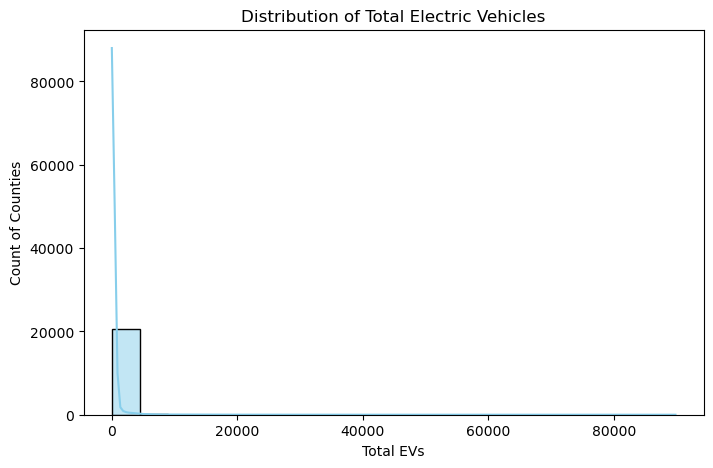

In [230]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['electric_vehicle_(ev)_total'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Total Electric Vehicles")
plt.xlabel("Total EVs")
plt.ylabel("Count of Counties")
plt.show()


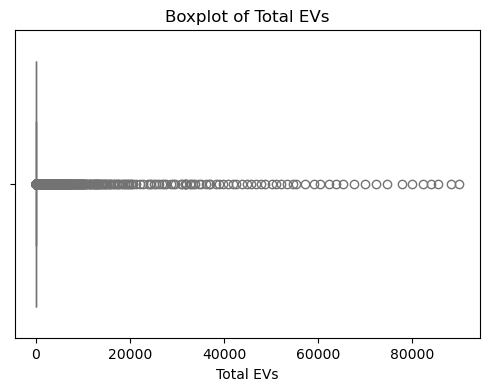

In [232]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['electric_vehicle_(ev)_total'], color='lightgreen')
plt.title("Boxplot of Total EVs")
plt.xlabel("Total EVs")
plt.show()


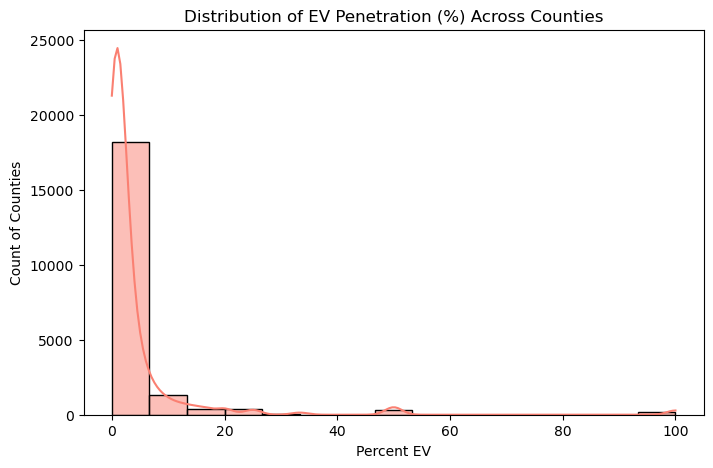

In [234]:
plt.figure(figsize=(8,5))
sns.histplot(df['percent_electric_vehicles'], bins=15, kde=True, color='salmon')
plt.title("Distribution of EV Penetration (%) Across Counties")
plt.xlabel("Percent EV")
plt.ylabel("Count of Counties")
plt.show()


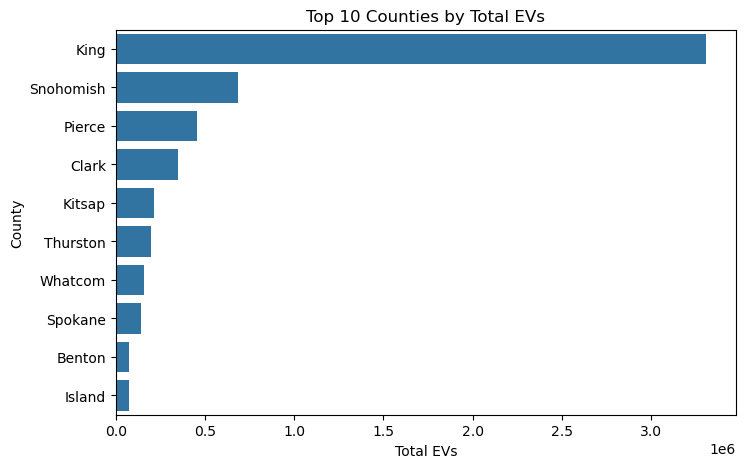

In [238]:
top10 = df.groupby('county')['electric_vehicle_(ev)_total'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top10.values, y=top10.index)
plt.title("Top 10 Counties by Total EVs")
plt.xlabel("Total EVs")
plt.ylabel("County")
plt.show()

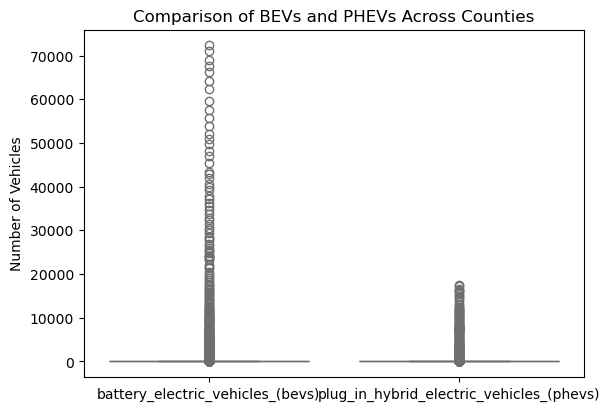

In [246]:
plt.figure(figsize=(6,4),layout="constrained")
sns.boxplot(data=df[['battery_electric_vehicles_(bevs)','plug_in_hybrid_electric_vehicles_(phevs)']], palette=['skyblue','lightgreen'])
plt.title("Comparison of BEVs and PHEVs Across Counties")
plt.ylabel("Number of Vehicles")
plt.show()


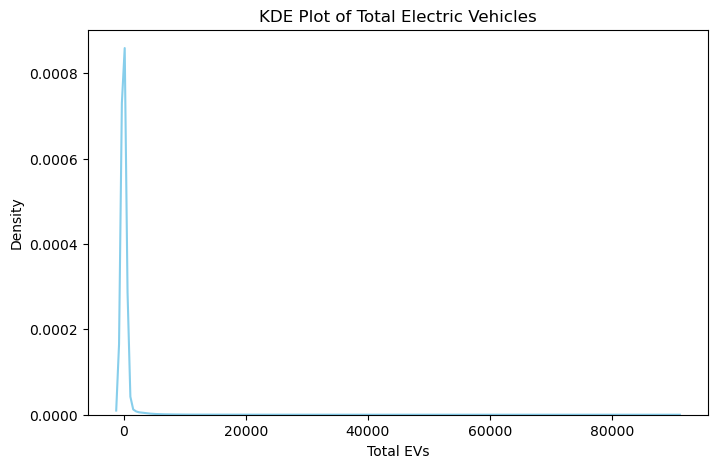

In [244]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['electric_vehicle_(ev)_total'], color='skyblue')
plt.title("KDE Plot of Total Electric Vehicles")
plt.xlabel("Total EVs")
plt.ylabel("Density")
plt.show()

## Bivariate Analysis

In [120]:
df[['battery_electric_vehicles_(bevs)', 
    'plug_in_hybrid_electric_vehicles_(phevs)']].sum()


battery_electric_vehicles_(bevs)            4528470
plug_in_hybrid_electric_vehicles_(phevs)    1666845
dtype: int64

In [124]:
df.groupby('county')['electric_vehicle_(ev)_total'].sum().sort_values(ascending=False).head(10)

county
King         3309850
Snohomish     683598
Pierce        456003
Clark         351317
Kitsap        214711
Thurston      198261
Whatcom       160625
Spokane       143242
Benton         74876
Island         71790
Name: electric_vehicle_(ev)_total, dtype: int64

In [135]:
df.groupby('county')['percent_electric_vehicles'].mean().sort_values(ascending=False).head(10)


county
Danville        100.000000
Sevier          100.000000
Bradley          84.090909
Las Animas       81.250000
Clinton          80.434783
Ray              66.666667
RÃ­o Grande      65.714286
St. Lawrence     50.693750
Texas            50.000000
Louisa           50.000000
Name: percent_electric_vehicles, dtype: float64

## Visualization Section

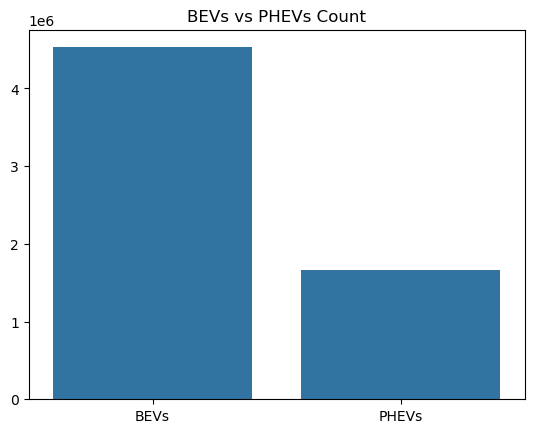

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    x=['BEVs', 'PHEVs'],
    y=[
        df['battery_electric_vehicles_(bevs)'].sum(),
        df['plug_in_hybrid_electric_vehicles_(phevs)'].sum()
    ]
)
plt.title("BEVs vs PHEVs Count")
plt.show()


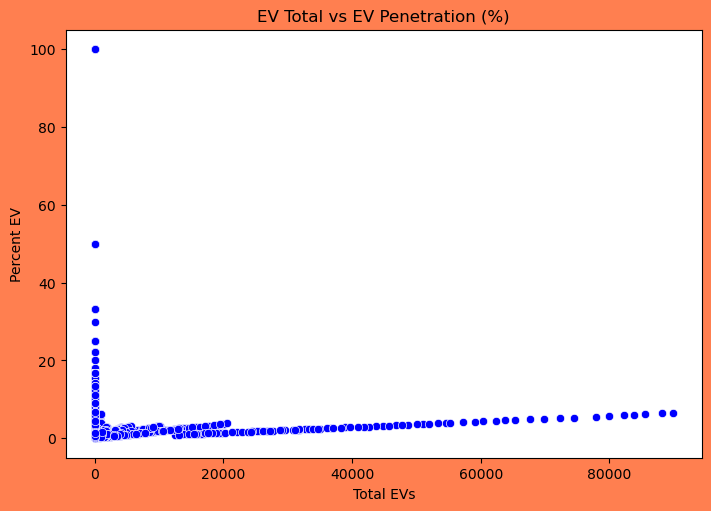

In [252]:
plt.figure(figsize=(7,5),layout="constrained",facecolor = "coral")
sns.scatterplot(x='electric_vehicle_(ev)_total', y='percent_electric_vehicles', data=df, color='blue')
plt.title("EV Total vs EV Penetration (%)")
plt.xlabel("Total EVs")
plt.ylabel("Percent EV")
plt.show()

<Figure size 700x500 with 0 Axes>

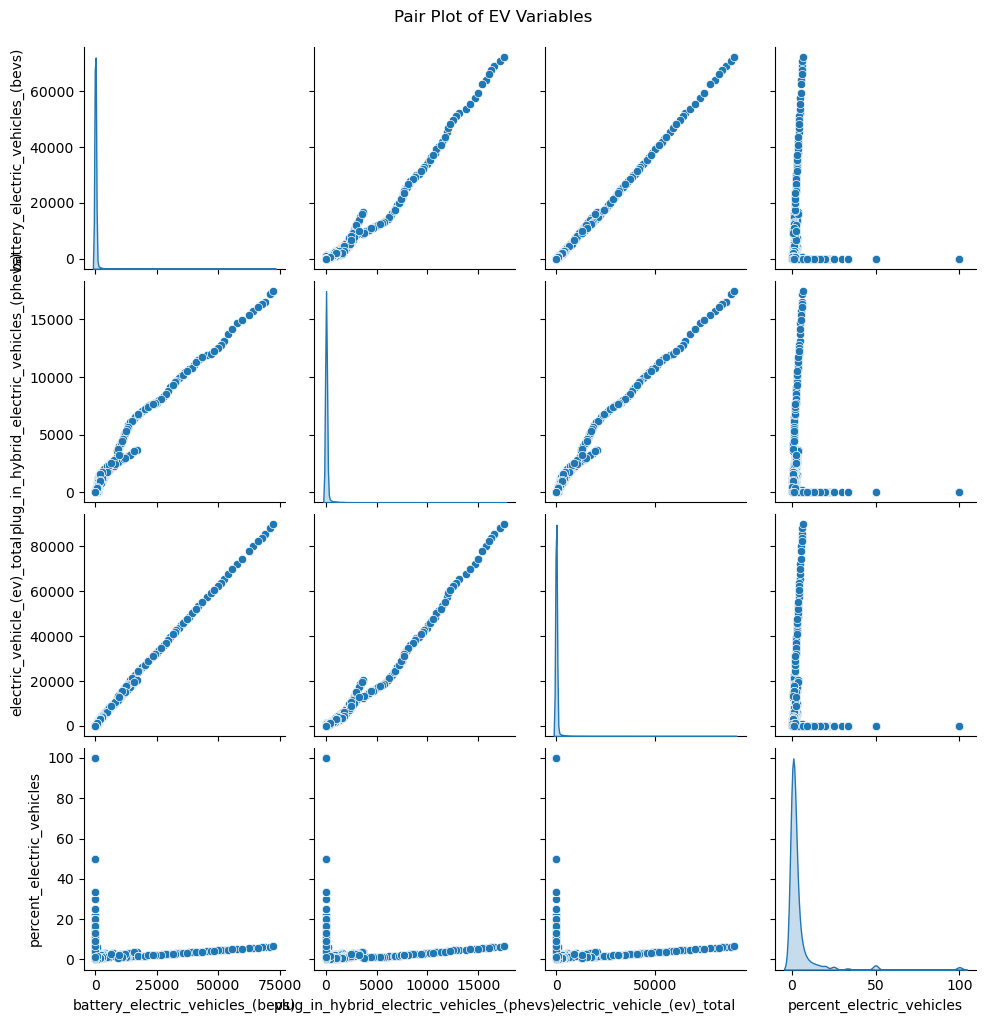

In [268]:
cols = [
    'battery_electric_vehicles_(bevs)',
    'plug_in_hybrid_electric_vehicles_(phevs)',
    'electric_vehicle_(ev)_total',
    'percent_electric_vehicles'
]

sns.pairplot(df[cols], diag_kind='kde')
plt.suptitle("Pair Plot of EV Variables", y=1.02)
plt.show()

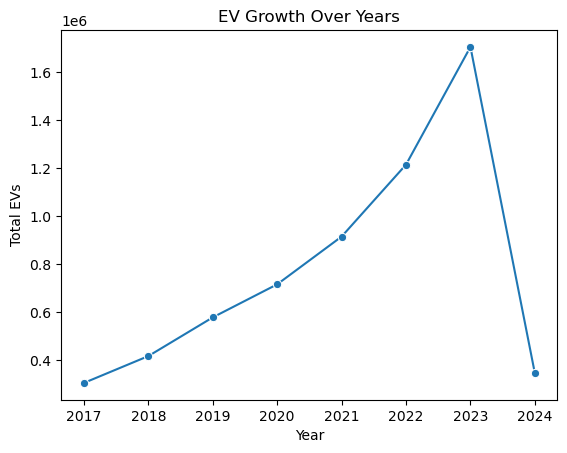

In [273]:
df['date'] = pd.to_datetime(df['date'])
ev_by_year = df.groupby(df['date'].dt.year)['electric_vehicle_(ev)_total'].sum()

sns.lineplot(x=ev_by_year.index, y=ev_by_year.values, marker='o')
plt.title("EV Growth Over Years")
plt.xlabel("Year")
plt.ylabel("Total EVs")
plt.show()

In [275]:
top_counties = df.groupby('county')['electric_vehicle_(ev)_total'].sum().sort_values(ascending=False).head(10)
bottom_counties = df.groupby('county')['electric_vehicle_(ev)_total'].sum().sort_values().head(10)


In [277]:
df[['total_vehicles','percent_electric_vehicles']].corr()


,total_vehicles,percent_electric_vehicles
total_vehicles,1.000000,-0.062494
percent_electric_vehicles,-0.062494,1.000000


## Summary & Insights
  
  - King County has the highest EV count.
  - BEVs dominate PHEVs in all counties.
  - California and Washington show highest EV penetration percentages.
  - EV adoption correlates moderately with total vehicles.

In [280]:
df["county"].nunique()

311